### Predictive Modeling for Loan Default with Streamlit App Deployment

In [43]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA #  reduce dimensionality
import category_encoders as ce # for target encoding
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv(r"Loan_default.csv/Loan_default.csv")

#### Data Exploration

In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
# Overview of data types, non-null values, and memory usage
print("\nData Information:")
df.info()


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  obje

In [5]:
# Summary statistics of numerical features
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [6]:
# Check for missing values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

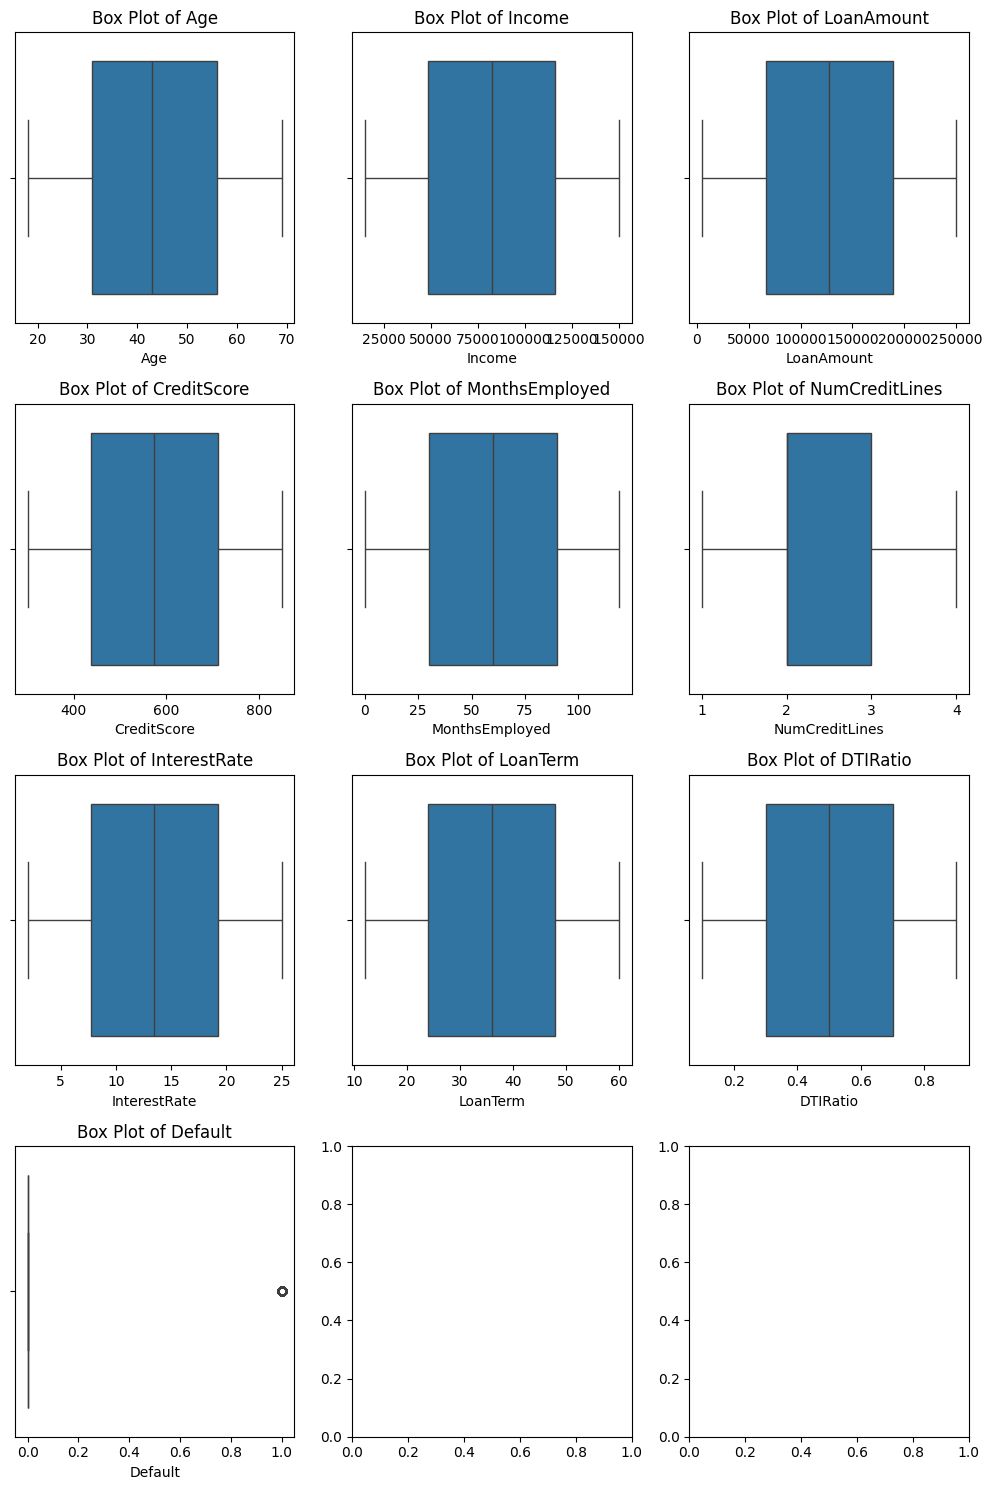

In [8]:
# Univariate analysis of numerical variables with box plots in subplots
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns for the subplot grid
num_cols = 3  # You can adjust the number of columns based on your preference
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Loop through each numerical column and create a box plot in the corresponding subplot
for i, column in enumerate(numerical_columns):
    plt.sca(axes[i])
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


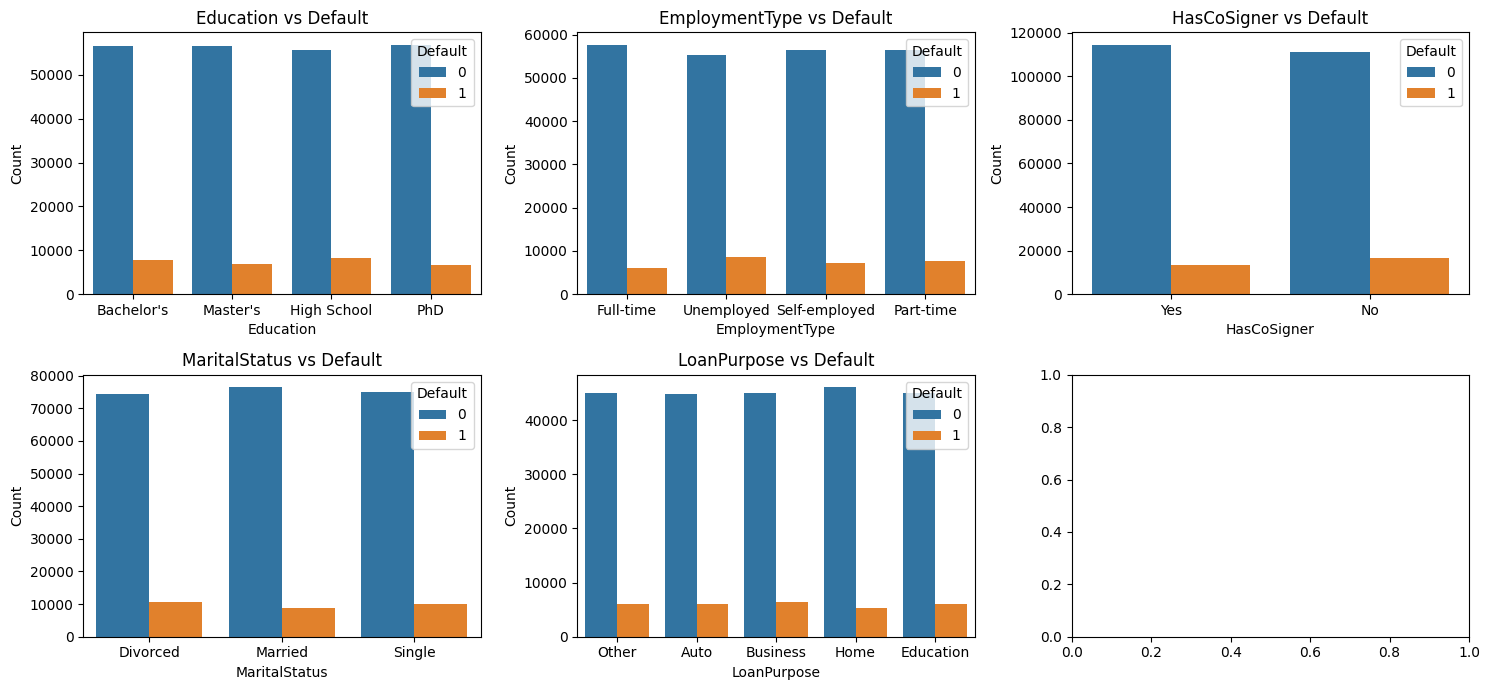

In [14]:
# Assuming categorical_features is your list of categorical features
categorical_features = ['Education', 'EmploymentType', 'HasCoSigner', 'MaritalStatus', 'LoanPurpose',]

# Calculate the number of rows and columns for the subplot grid
num_cols = 3  # You can adjust the number of columns based on your preference
num_rows = (len(categorical_features) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 7))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Loop through each categorical feature and create a count plot in the corresponding subplot
for i, feature in enumerate(categorical_features):
    ax = axes[i]
    sns.countplot(x=feature, hue='Default', data=df, ax=ax)
    ax.set_title(f'{feature} vs Default')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

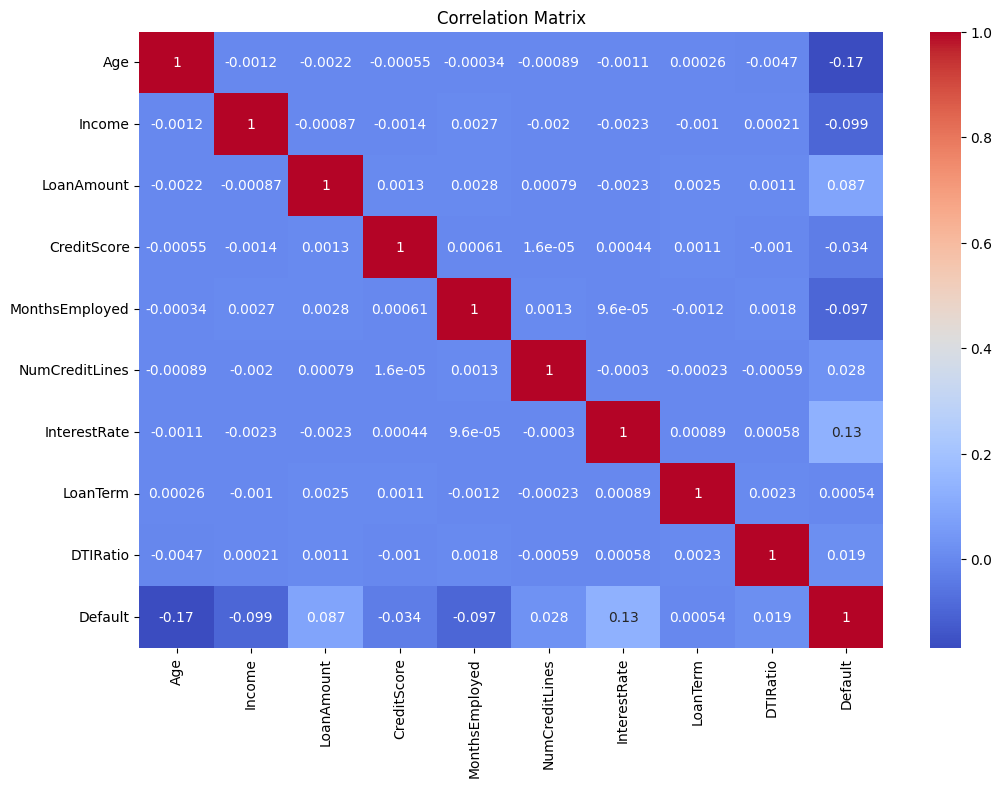

In [18]:
# Exclude non-numeric columns before calculating correlation matrix
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix for numerical features
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Data Preprocessing

In [23]:
# First we would drop LoanID as it provides no predictive power to our model

data = df.drop('LoanID', axis = 1)
data.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner', 'Default'],
      dtype='object')

In [25]:
# Separate features and target variables
X = data.drop('Default', axis = 1)
y = data['Default']

In [26]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# In our dataset, we have categorical variables like 'Education,' 'EmploymentType,' 'MaritalStatus,' 'LoanPurpose,' and 'HasCoSigner.'
# Traditional one-hot encoding can significantly increase dimensionality, and in the context of a large dataset, this can pose computational challenges.
# In a bid to keep the dataset manageable in terms of dimensionality, we would use Target encoding, that way, we are maintaining valuable information from 
# categorical variables and mitigating the potential computational burden associated with high dimensionality.

# The target encoding is appropriately applied to the training set, and the encoder instance is fitted on the training set only. 
# The same encoding transformation is then consistently applied to both the training and test sets. 

# Encode categorical variables using target encoding on the training set
encoder = ce.TargetEncoder()
X_train_encoded = encoder.fit_transform(X_train, y_train)

# Apply the same encoding to the test set
X_test_encoded = encoder.transform(X_test)

In [31]:
# Now let's scale the data tp sort of standardize

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [33]:
# In order to reduce the dimensionality, I would be using PCA to reduce the number of features while preserving essential patterns in the data

pca = PCA(n_components=10) # I want to retain 10 principal components 
X_train_pca = pca.fit_transform(X_train_scaled)

# We will apply the same PCA transforms to the test set
X_test_pca = pca.transform(X_test_scaled)


#### Model Training and Evaluation to get baseline Model Performance

In [36]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the PCA-transformed training data
rf_classifier.fit(X_train_pca, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test_pca)

# Display classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.45      0.01      0.01      5900

    accuracy                           0.88     51070
   macro avg       0.67      0.50      0.48     51070
weighted avg       0.83      0.88      0.83     51070

Confusion Matrix:
[[45122    48]
 [ 5861    39]]


In [ ]:
# CLASSIFICATION REPORT

# ACCURACY
# Overall model accuracy is 88%, indicating the proportion of correctly predicted instances (both non-default and default).

# PRECISION
# Precision for class 0 (non-default) is high (0.89), indicating that when the model predicts a non-default, it is correct 89% of the time.
# Precision for class 1 (default) is lower (0.45), suggesting that when the model predicts a default, it is correct only 45% of the time.

# RECALL
# Recall for class 0 is very high (1.00), indicating that the model correctly captures nearly all instances of non-default.
# Recall for class 1 is very low (0.01), suggesting that the model misses a significant number of actual default instances.

# F1 SCORE
# The F1-score is the harmonic mean of precision and recall. For class 0, it is high (0.94), while for class 1, it is extremely low (0.01).

In [42]:
# CONFUSION MATRIX

# The model seems to be performing well in terms of predicting negative instances (non-default), as shown by a high count in the True Negative (TN) cell.
# However, there's a notable imbalance in the predictions for positive instances (default).

# since predicting default instances is a priority, there might be a need for further optimization.
# we would explore some techniques to handle class imbalance

In [ ]:
# The extremely low recall for class 1 suggests that the model is missing a significant number of actual default cases. 
# This aligns with the observation from the confusion matrix.

#### Addressing Class Imbalance

In [44]:
# I am exploring a combination of downsampling the majority class followed by oversampling the minority class can indeed be a viable compromise. 
# This approach aims to strike a balance between addressing class imbalance and managing computational efficiency.

over_sampler = SMOTE(sampling_strategy=0.5) # SMOTE will generate synthetic samples until the number of synthetic samples is half the number of original minority class samples.
under_sampler = RandomUnderSampler(sampling_strategy=0.5) # keeping half of the majority class samples.

In [ ]:
# We do not know git. I will not teach moses Git